In [2]:
import numpy as np
import scipy.linalg as lng

In [3]:
def func(x: float) -> np.array:
    return np.array([[1, x, x**2]])

def getM(p: np.array, x: np.array) -> np.array:
    M = np.zeros(shape=(p.shape[0], p.shape[0]))
    for i in range(p.shape[0]):
        M += p[i] * np.dot(func(x[i]).T, func(x[i]))
    return M

def getD(M:np.array) -> np.array:
    return lng.inv(M)

def get_metric(M, D, x, p):

    print('D оптимальный план')
    print(lng.det(D))

    print('A оптимальный план')
    print(np.trace(D))

    print('E оптимальный план')
    print(lng.eigvals(D).max())

    print('Ф2 оптимальный план')
    print((1/2)* np.trace(D @ D))

    print('Л оптимальный план')
    eig_avg = 0
    for i in range(x.shape[0]):
        eig_avg += lng.eigvals(D)[i]
    eig_avg /= x.shape[0]
    res = 0
    for i in range(x.shape[0]):
        res += (lng.eigvals(D)[i] - eig_avg)**2
    print(res)

    print('MV оптимальный план')
    res = D[0][0]
    for i in range(1, x.shape[0]):
        if D[i][i] > res:
            res = D[i][i]
    print(res)

    print('G оптимальный план')

    d = np.dot(np.dot(func(x[0]), D), func(x[0]).T)
    for i in range(3):
        if np.dot(np.dot(func(x[i]), D), func(x[i]).T) > d:
            d = np.dot(np.dot(func(x[i]), D), func(x[i]).T)
    print(d)


In [4]:
x = np.array([-1, 0, 1])
p = np.array([0.2, 0.6, 0.2])

M = getM(p, x)
D = getD(M)
get_metric(M, D, x, p)

x = np.array([-1, 0, 1])
p = np.array([0.25, 0.5, 0.25])
M = getM(p, x)
D = getD(M)
get_metric(M, D, x, p)

x = np.array([-1, 0, 1])
p = np.array([0.1884, 0.6233, 0.1884])
M = getM(p, x)
D = getD(M)
get_metric(M, D, x, p)

x = np.array([-1, 0, 1])
p = np.array([0.333, 0.333, 0.333])
M = getM(p, x)
D = getD(M)
get_metric(M, D, x, p)

D оптимальный план
10.41666666666667
A оптимальный план
8.333333333333334
E оптимальный план
(5+0j)
Ф2 оптимальный план
15.972222222222225
Л оптимальный план
(8.796296296296298+0j)
MV оптимальный план
4.166666666666667
G оптимальный план
[[5.]]
D оптимальный план
8.0
A оптимальный план
8.0
E оптимальный план
(5.23606797749979+0j)
Ф2 оптимальный план
16.0
Л оптимальный план
(10.666666666666668+0j)
MV оптимальный план
4.0
G оптимальный план
[[4.]]
D оптимальный план
11.300068726909515
A оптимальный план
8.51658336577827
E оптимальный план
(5.013350023030937+0j)
Ф2 оптимальный план
16.449165586744353
Л оптимальный план
(8.720933764738328+0j)
MV оптимальный план
4.258291682889135
G оптимальный план
[[5.30785563]]
D оптимальный план
6.770290567601386
A оптимальный план
9.009009009009006
E оптимальный план
(6.849178397610855+0j)
Ф2 оптимальный план
24.799574349123887
Л оптимальный план
(22.545067590112627+0j)
MV оптимальный план
4.504504504504504
G оптимальный план
[[3.003003]]


In [21]:
x = np.array([-1, 0, 1])
p = []
q = []
D_crit = []
for i in [i * 0.01  for i in range(10, 50)]:
    p = np.array([i, 1- (2*i), i])
    M = getM(p, x)
    D = getD(M)
    q.append(i)
    D_crit.append(lng.det(D))

In [39]:
min(D_crit), q[D_crit.index(min(D_crit))]

(6.75201209960568, 0.33)

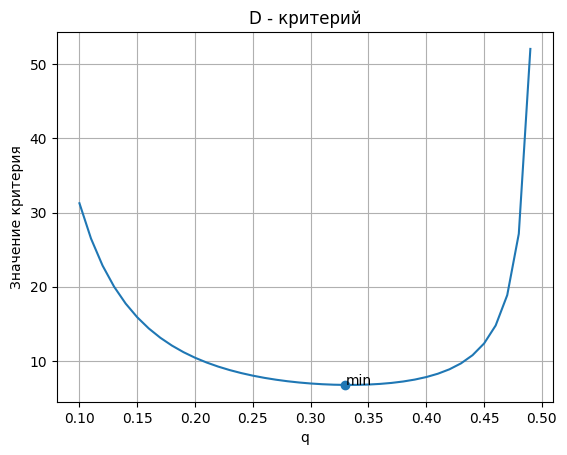

In [41]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(q, D_crit)
plt.scatter(q[D_crit.index(min(D_crit))], min(D_crit))
plt.title('D - критерий')
plt.xlabel('q')
plt.ylabel('Значение критерия')
plt.grid(True)
plt.text(q[D_crit.index(min(D_crit))], min(D_crit), 'min')
plt.show()